In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Label dictionary
labels_diction = {
    'Bacterial leaf blight': 0,
    'Brown spot': 1,
    'Leaf smut': 2,
}

# Set data directory
data_dir = '/content/drive/MyDrive/DataSets/rice_leaf_diseases'


In [ ]:
# Loading and preprocessing images
X = []
y = []
for folder in os.listdir(data_dir):
    label = labels_diction[folder]
    for image in os.listdir(os.path.join(data_dir, folder)):
        image_path = os.path.join(data_dir, folder, image)
        img = cv2.imread(image_path)
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)


In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(X, y, batch_size=32)


In [ ]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(labels_diction), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=20
)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 661ms/step - accuracy: 0.3954 - loss: 1.1015
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.3743 - loss: 1.1034
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.4381 - loss: 1.0655
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.4571 - loss: 1.0454
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.5008 - loss: 0.9989
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.3718 - loss: 1.0635
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.5115 - loss: 0.9539
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.4734 - loss: 0.9999
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.5798 - loss: 0.9681
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.5080 - loss: 1.0138
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.4542 - loss: 1.0451
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.4900 - lo

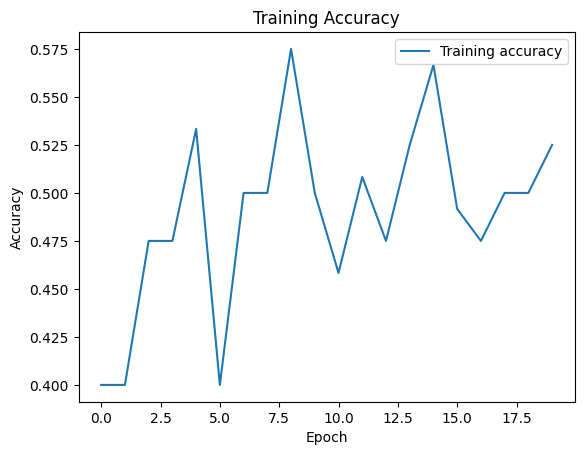

In [ ]:
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Save the model
model.save('rice_leaf_diseases_model_vgg16.h5')

# Load the model for future use
new_model = tf.keras.models.load_model('rice_leaf_diseases_model_vgg16.h5')


In [ ]:
import PIL
image_path = '/content/drive/MyDrive/DataSets/rice_leaf_diseases/Leaf smut/DSC_0310.JPG'
test_image = PIL.Image.open(image_path)
resized_image = test_image.resize((224, 224))
resized_image = np.array(resized_image) / 255.0
resized_image = resized_image[np.newaxis, ...]
prediction = new_model.predict(resized_image)
predicted_class_index = np.argmax(prediction)
print('Predicted class index:', predicted_class_index)

predicted_label = {v: k for k, v in labels_diction.items()}.get(predicted_class_index)
print('Predicted label:', predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
Predicted class index: 2
Predicted label: Leaf smut


TypeError: 'int' object is not subscriptable

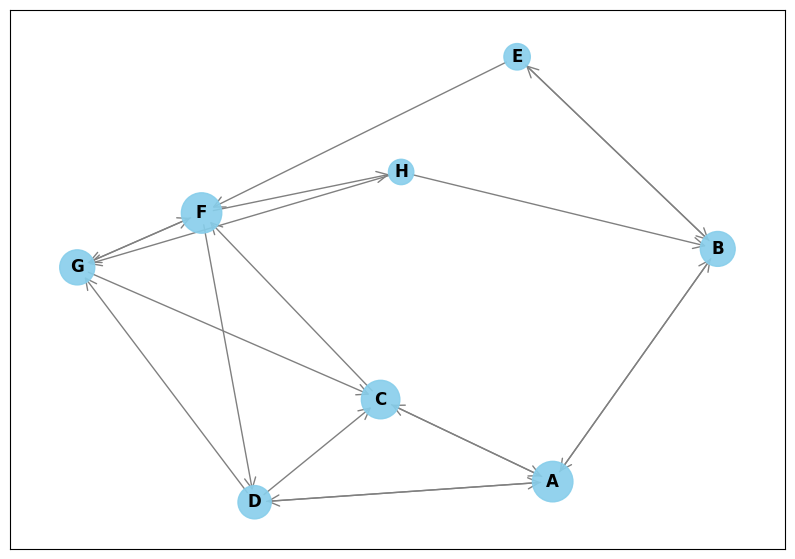

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def page_rank(graph, num_iterations=100, damping_factor=0.85):
    n = len(graph)  # Number of nodes/pages
    rank = np.ones(n) / n  # Initialize rank of each page
    damping_value = (1 - damping_factor) / n  # (1-d)/N

    for _ in range(num_iterations):
        new_rank = np.zeros(n)
        for i in range(n):
            for j in range(n):
                if graph[j][i] == 1:  # If there's a link from j to i
                    new_rank[i] += rank[j] / np.sum(graph[j])
            new_rank[i] = damping_value + damping_factor * new_rank[i]
        rank = new_rank

    return rank

def visualize_graph(graph, ranks):
    G = nx.DiGraph()

    # Add edges to the graph based on the adjacency matrix
    n = len(graph)
    for i in range(n):
        for j in range(n):
            if graph[i][j] == 1:
                G.add_edge(chr(65 + i), chr(65 + j))  # Nodes A, B, C, etc.

    # Set node sizes based on their PageRank scores (scaled for visualization)
    sizes = [r * 5000 for r in ranks]  # Scale the ranks for better visualization

    pos = nx.spring_layout(G)  # Position the nodes using a spring layout
    plt.figure(figsize=(10, 7))

    # Draw nodes with sizes and labels
    nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color='skyblue', alpha=0.9)
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif", font_weight="bold")

    # Add labels to show PageRank scores for nodes
    rank_labels = {node: f'{r:.2f}' for node, r in zip(G.nodes, ranks)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=rank_labels, font_color='red')

    plt.title('PageRank Visualization with Connections and Ranks', fontsize=16)
    plt.show()

# Bigger graph of 8 pages
graph = np.array([[0, 1, 1, 1, 0, 0, 0, 0],  # A links to B, C, D
                  [1, 0, 0, 0, 1, 0, 0, 0],  # B links to A, E
                  [1, 0, 0, 0, 0, 1, 0, 0],  # C links to A, F
                  [1, 0, 1, 0, 0, 0, 1, 0],  # D links to A, C, G
                  [0, 1, 0, 0, 0, 1, 0, 0],  # E links to B, F
                  [0, 0, 0, 1, 0, 0, 1, 1],  # F links to D, G, H
                  [0, 0, 1, 0, 0, 1, 0, 0],  # G links to C, F
                  [0, 1, 0, 0, 0, 0, 1, 0]]) # H links to G, B

# Calculate PageRank values
ranks = page_rank(graph)

# Visualize the graph with ranks
visualize_graph(graph, ranks)
